In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

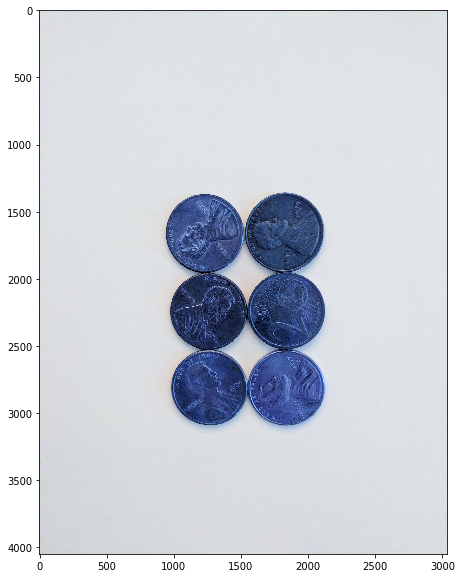

In [3]:
img = cv2.imread('../DATA/pennies.jpg')
display(img)

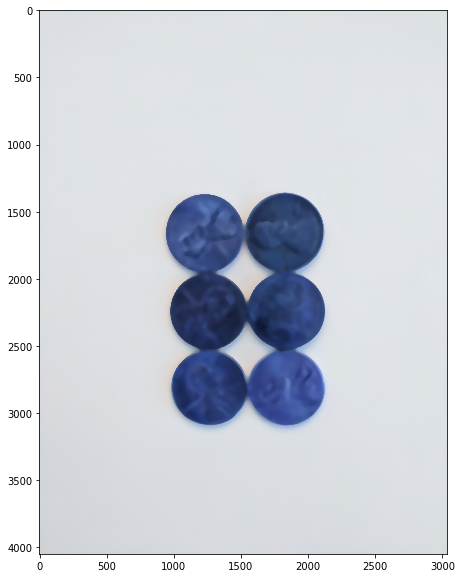

In [6]:
img = cv2.medianBlur(img,35)
display(img)

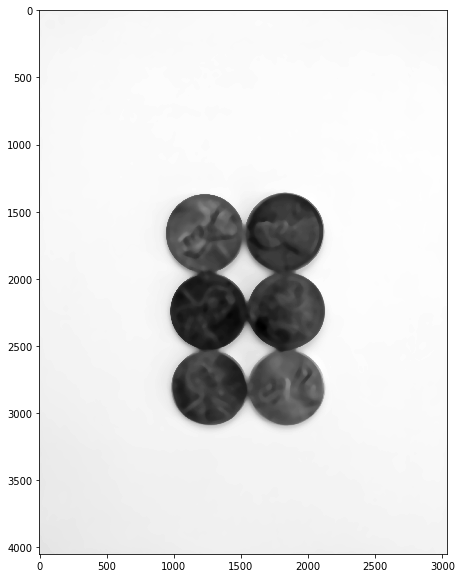

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

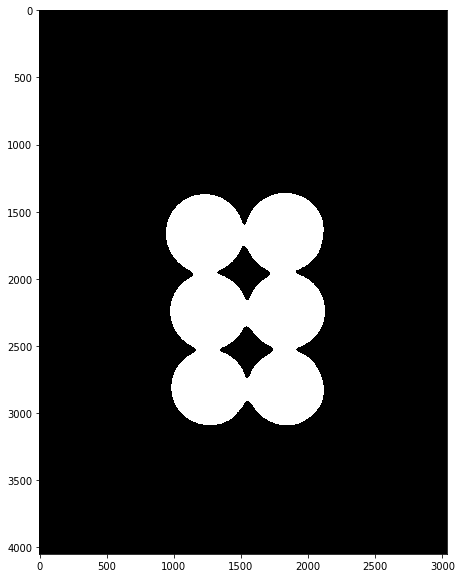

In [8]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

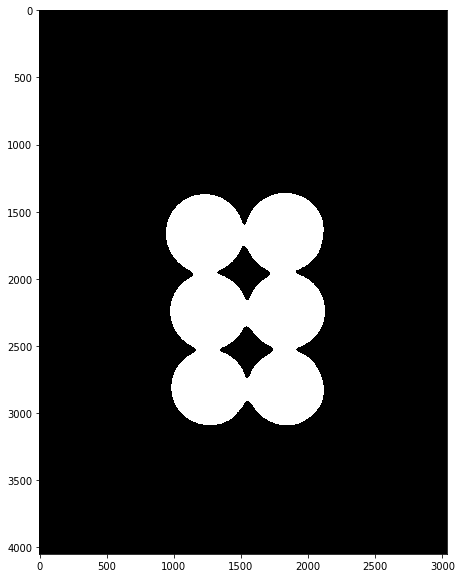

In [9]:
kernel=np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display(opening)

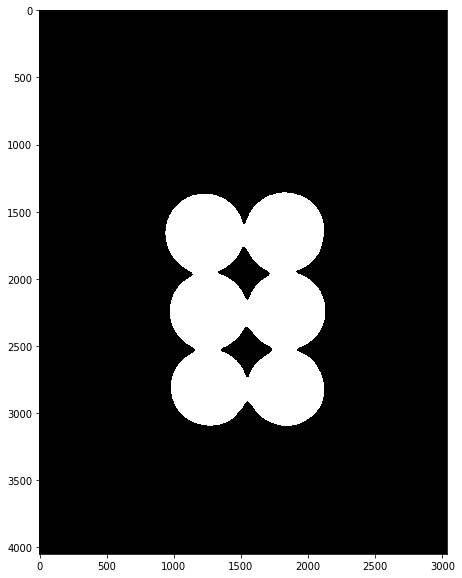

In [11]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

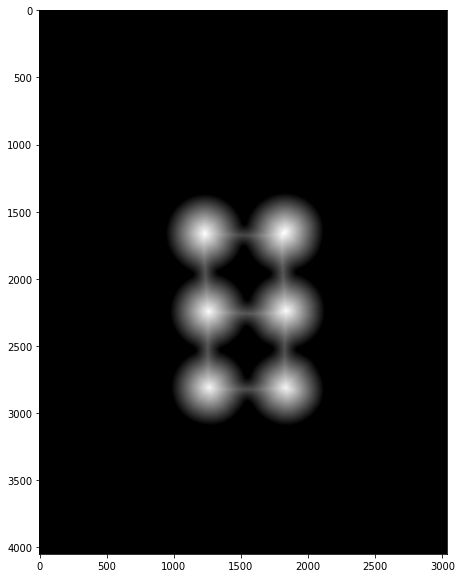

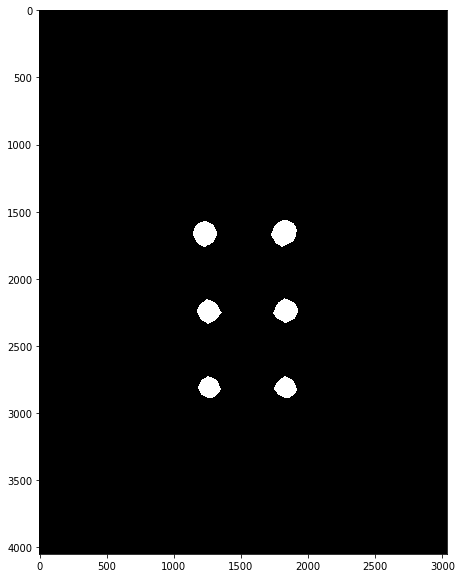

In [15]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,.7*dist_transform.max(),255,0)
display(dist_transform)
display(sure_fg)

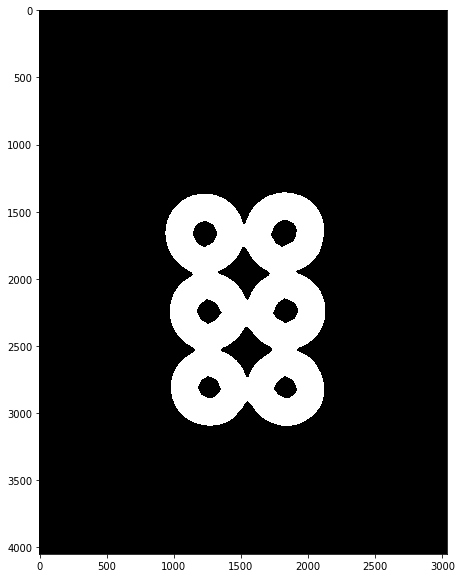

In [17]:
sure_fg=np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown)

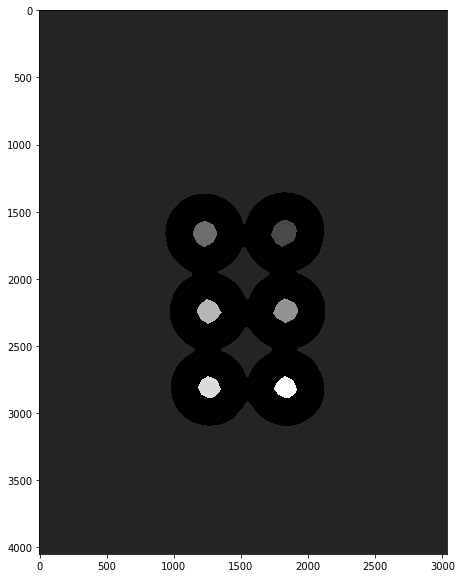

In [19]:
ret,markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown == 255]=0
display(markers)

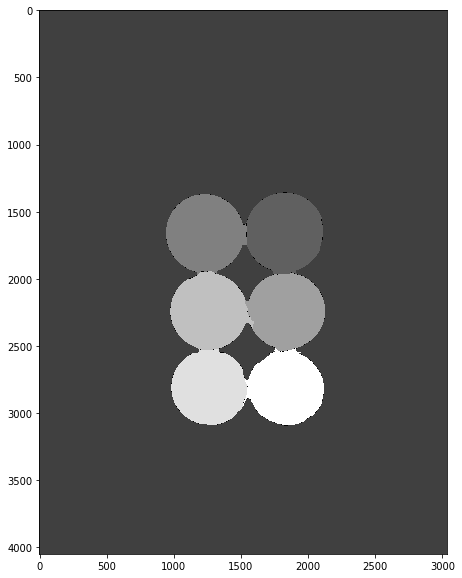

In [20]:
markers = cv2.watershed(img,markers)
display(markers)

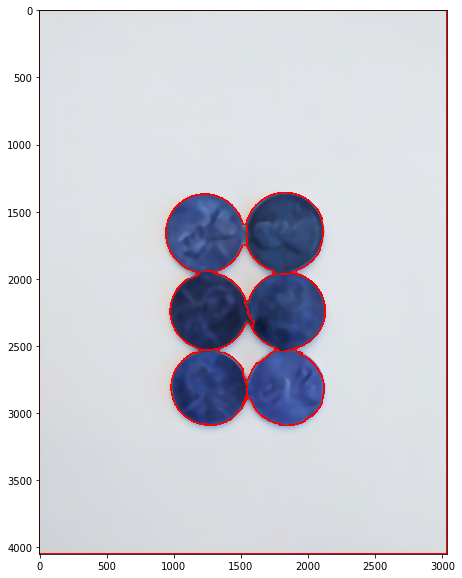

In [21]:
contour,her =cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contour)):
    if her[0][i][3]== -1:
        cv2.drawContours(img,contour,i,(255,0,0),10)
display(img)